In [96]:
#Setting up the environment and loading the dataset
import numpy as np
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import RFE
from sklearn.ensemble import GradientBoostingRegressor
from xgboost import XGBRegressor
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import SimpleImputer
# Define the path to the dataset
titanic_train = f'C:\\Users\\Rohan\\Desktop\\Rohan\\Kaggle\\titanic\\train.csv'
titanic_test = f'C:\\Users\\Rohan\\Desktop\\Rohan\\Kaggle\\titanic\\test.csv'

# Load the dataset
titanic_data_train = pd.read_csv(titanic_train)
titanic_data_test = pd.read_csv(titanic_test)

In [97]:
titanic_data_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [98]:
titanic_data_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


<Axes: >

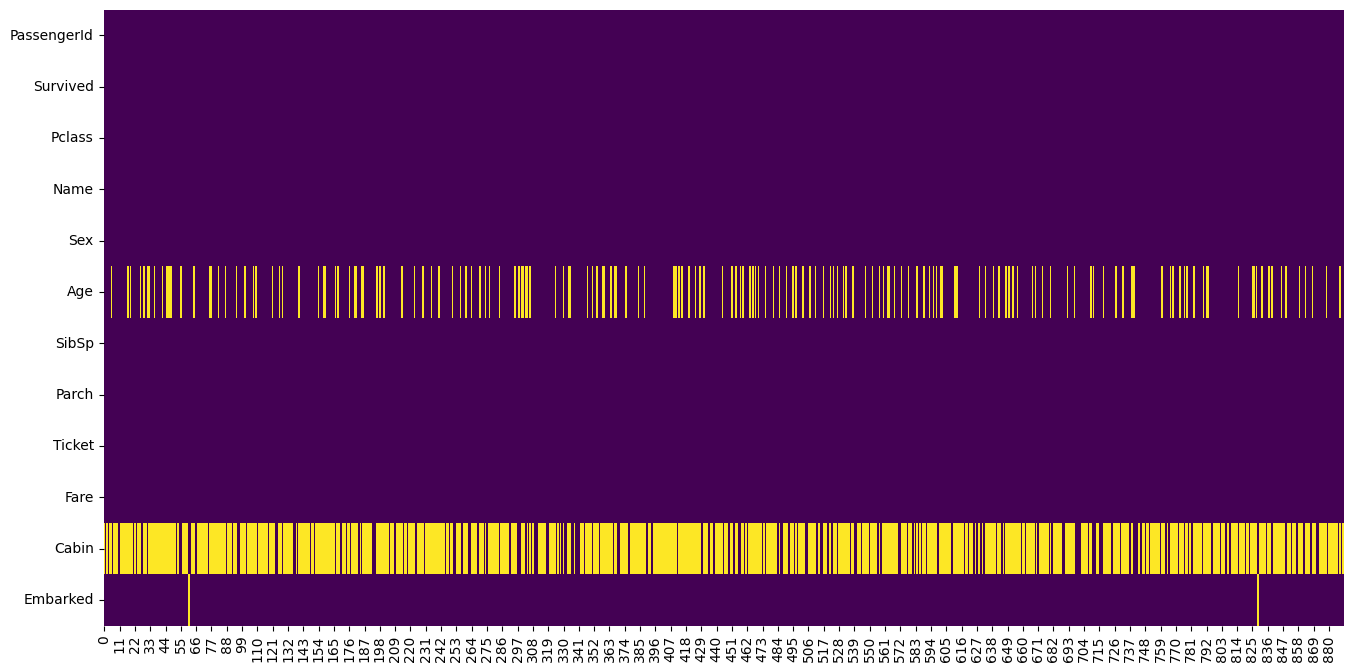

In [99]:
#Plotting missing values
plt.figure(figsize=(16, 8))
sns.heatmap(titanic_data_train.isnull().T, cbar=False, cmap='viridis')

In [100]:
string = SimpleImputer(missing_values=np.nan, strategy='most_frequent')
Num = SimpleImputer(missing_values=np.nan, strategy='median')
# Filling missing values in categorical columns with the most frequent value
titanic_data_train['Age'] = Num.fit_transform(titanic_data_train[['Age']]).ravel()
titanic_data_train['Embarked'] = string.fit_transform(titanic_data_train[['Embarked']]).ravel()
titanic_data_train['Cabin'] = string.fit_transform(titanic_data_train[['Cabin']]).ravel()
titanic_data_train['Fare'] = Num.fit_transform(titanic_data_train[['Fare']])

titanic_data_test['Age'] = Num.fit_transform(titanic_data_test[['Age']]).ravel()
titanic_data_test['Embarked'] = string.fit_transform(titanic_data_test[['Embarked']]).ravel()
titanic_data_test['Cabin'] = string.fit_transform(titanic_data_test[['Cabin']]).ravel()
titanic_data_test['Fare'] = Num.fit_transform(titanic_data_test[['Fare']])


<Axes: >

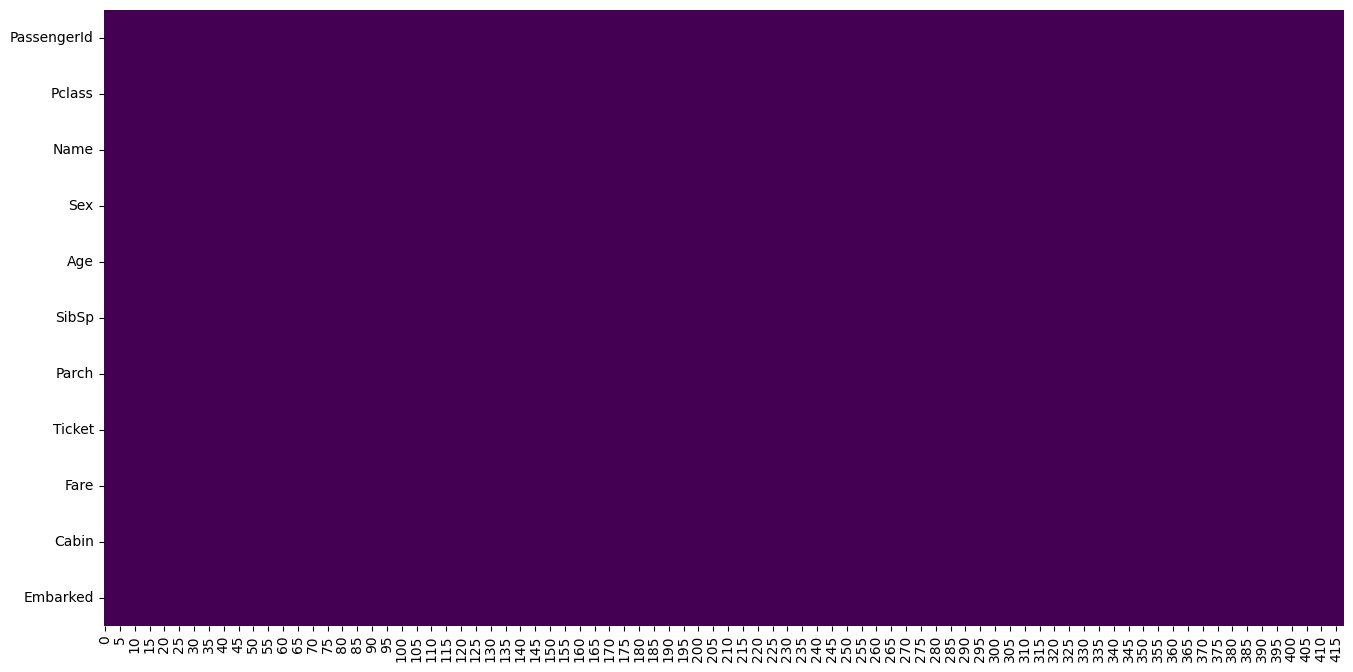

In [101]:
#Plotting missing values
plt.figure(figsize=(16, 8))
sns.heatmap(titanic_data_test.isnull().T, cbar=False, cmap='viridis')

In [102]:
titanic_data_train['FamilySize'] = titanic_data_train['SibSp'] + titanic_data_train['Parch']
titanic_data_test['FamilySize'] = titanic_data_test['SibSp'] + titanic_data_test['Parch']

# features = ['Pclass', 'Sex', 'Age', 'Fare', 'Embarked', 'FamilySize']
# X = titanic_data_train[features]
# y = titanic_data_train['Survived']
# X_test = titanic_data_test[features]

X = titanic_data_train.drop(['Survived'], axis=1)
y = titanic_data_train['Survived']
X_test = titanic_data_test[X.columns]

In [103]:
# Add placeholder column to allow merging and track rows
X['source'] = 'train'
X_test['source'] = 'test'

# Concatenate and one-hot encode
combined = pd.concat([X, X_test], axis=0)
combined_encoded = pd.get_dummies(combined)

# Split back into train/test
X_encoded = combined_encoded[combined_encoded['source_train'] == 1].drop(columns=['source_train', 'source_test'])
X_test_encoded = combined_encoded[combined_encoded['source_test'] == 1].drop(columns=['source_train', 'source_test'])


In [ ]:
# Decision Tree
housing_model = DecisionTreeRegressor(random_state=1, max_depth=20, min_samples_split=50, min_samples_leaf=5)
housing_model.fit(X_encoded, y)
df_model = housing_model.predict(X_test_encoded)

# Random Forest
rf_model = RandomForestRegressor(random_state=1)
rf_model.fit(X_encoded, y)
rf_model = rf_model.predict(X_test_encoded)
#rf_model floor value with no decimals
rf_model = np.floor(rf_model).astype(int)

# Gradient Boosting
gb_model = GradientBoostingRegressor(random_state=1)
gb_model.fit(X_encoded, y)
gb_model = gb_model.predict(X_test_encoded)

# XGBoost
xgb_model = XGBRegressor(random_state=1, n_estimators=100, learning_rate=0.001, max_depth=5, subsample=0.8, colsample_bytree=0.8)
xgb_model.fit(X_encoded, y)
xgb_model = xgb_model.predict(X_test_encoded)

rfc_model = RandomForestClassifier(n_estimators=100, max_depth=5, random_state=1)
rfc_model=rfc_model.fit(X_encoded, y)
rfc_model = rfc_model.predict(X_test_encoded)

In [105]:
print("Mean of Actual Prices:",df_model.mean())
print("Mean of Actual Prices:",rf_model.mean())
print("Mean of Actual Prices:",gb_model.mean())
print("Mean of Actual Prices:",xgb_model.mean())
print("Mean of Actual Prices:",rfc_model.mean())
print("Mean of Actual Prices:",y.values.mean())

Mean of Actual Prices: 0.6172436585970421
Mean of Actual Prices: 0.17703349282296652
Mean of Actual Prices: 0.45455813759508124
Mean of Actual Prices: 0.39302775
Mean of Actual Prices: 0.11244019138755981
Mean of Actual Prices: 0.3838383838383838


In [106]:
submission = pd.DataFrame({
    'PassengerId': titanic_data_test['PassengerId'],
    'Survived': rf_model  # or rf_preds, gb_preds, etc.
})
submission.to_csv('submission.csv', index=False)

In [107]:
X_test_encoded.head()

,PassengerId,Pclass,Age,SibSp,Parch,Fare,FamilySize,"Name_Abbing, Mr. Anthony","Name_Abbott, Master. Eugene Joseph","Name_Abbott, Mr. Rossmore Edward",...,Cabin_F G73,Cabin_F2,Cabin_F33,Cabin_F38,Cabin_F4,Cabin_G6,Cabin_T,Embarked_C,Embarked_Q,Embarked_S
0,892,3,34.5,0,0,7.8292,0,False,False,False,...,False,False,False,False,False,False,False,False,True,False
1,893,3,47.0,1,0,7.0000,1,False,False,False,...,False,False,False,False,False,False,False,False,False,True
2,894,2,62.0,0,0,9.6875,0,False,False,False,...,False,False,False,False,False,False,False,False,True,False
3,895,3,27.0,0,0,8.6625,0,False,False,False,...,False,False,False,False,False,False,False,False,False,True
4,896,3,22.0,1,1,12.2875,2,False,False,False,...,False,False,False,False,False,False,False,False,False,True
